Dataset loaded successfully!

Initial DataFrame info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6702 entries, 0 to 6701
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show_id       1000 non-null   object 
 1   type          1000 non-null   object 
 2   title         1000 non-null   object 
 3   director      633 non-null    object 
 4   cast          826 non-null    object 
 5   country       110 non-null    object 
 6   date_added    17 non-null     object 
 7   release_year  1000 non-null   float64
 8   rating        935 non-null    object 
 9   duration      1000 non-null   object 
 10  listed_in     1000 non-null   object 
 11  description   1000 non-null   object 
dtypes: float64(1), object(11)
memory usage: 628.4+ KB

First 5 rows of the dataset:
  show_id   type                 title        director  \
0      s1  Movie   The Grand Seduction    Don McKellar   
1      s2  Movie  Take Care Good Nig

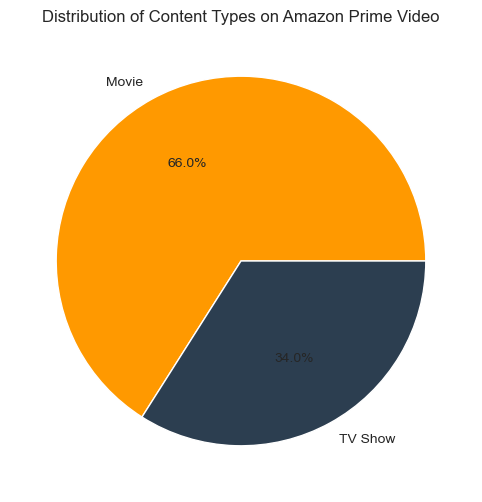


Top 10 Most Common Genres:


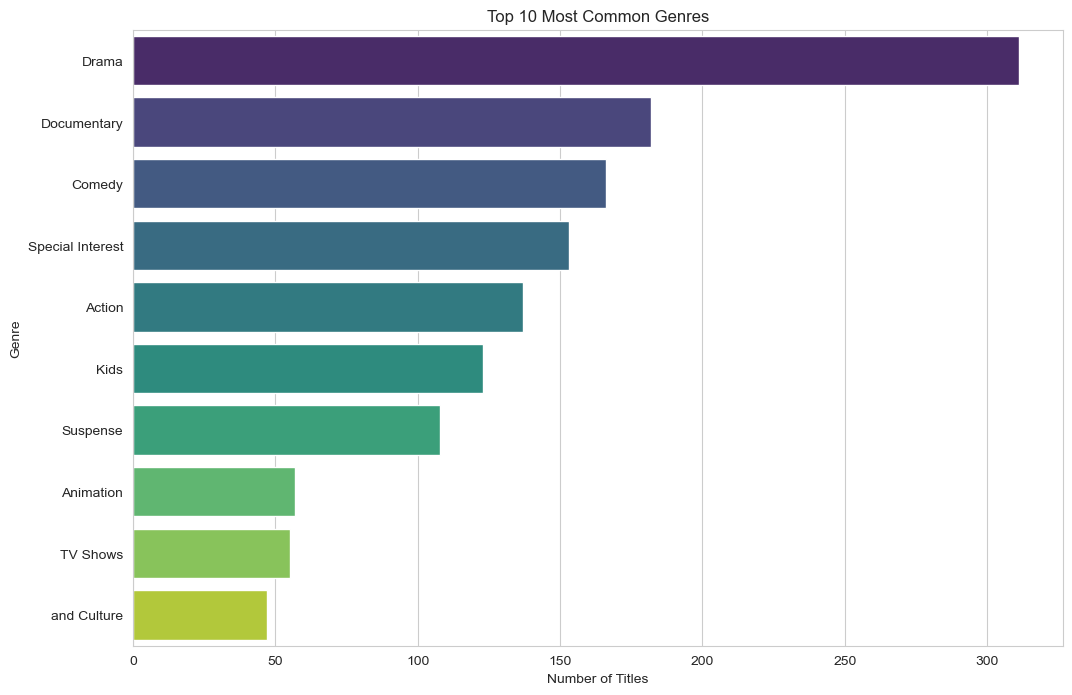


Scatter Plot: Release Year vs. Number of Genres


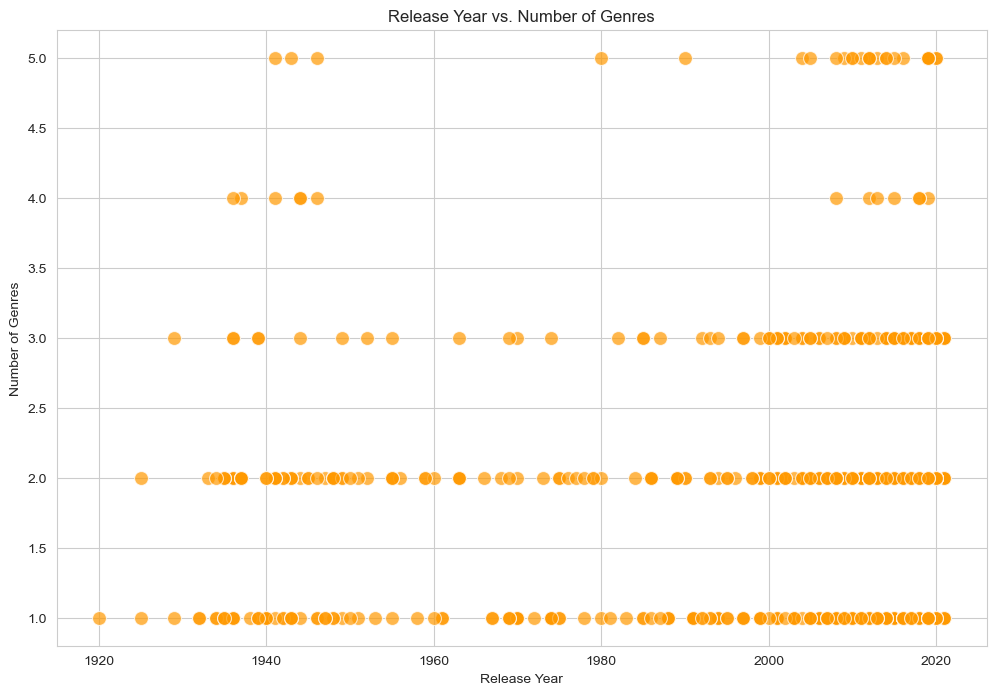


Top 10 Directors:


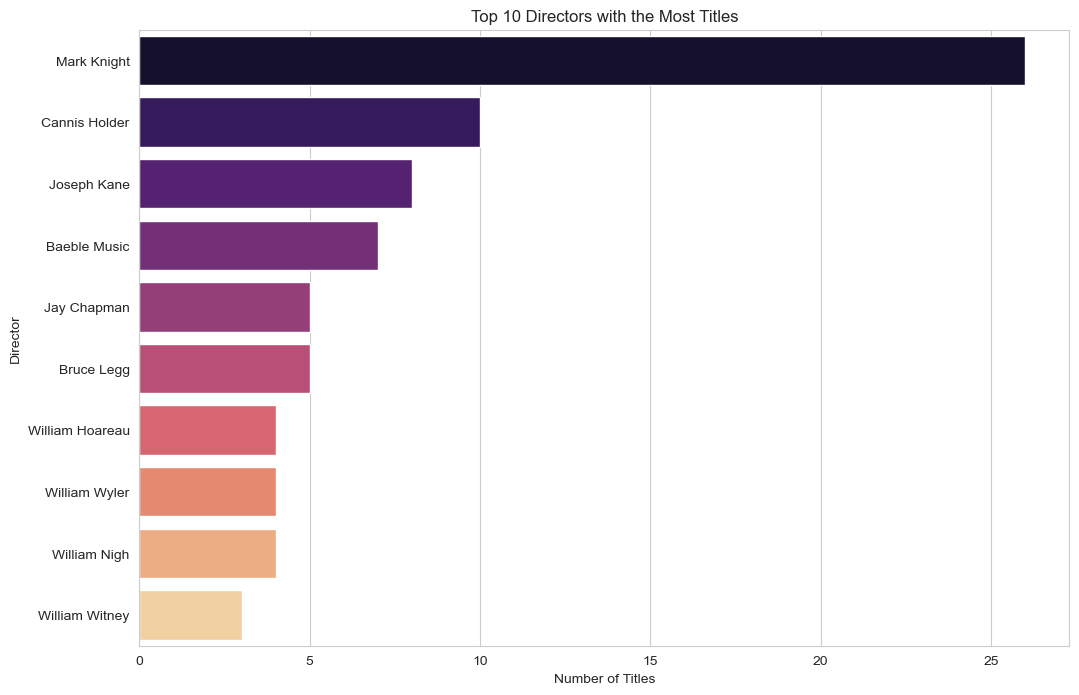

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#to supress output warnings
import warnings
warnings.filterwarnings('ignore')

file_path = 'amazon_prime.csv'

try:
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully!")
    print("\nInitial DataFrame info:")
    df.info()
except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found. Please make sure the dataset is in the same directory as this script.")
    exit()
print("\nFirst 5 rows of the dataset:")
print(df.head())

df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)

df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

df.drop_duplicates(inplace=True)
print(f"\nDataFrame shape after dropping duplicates: {df.shape}")

df['release_decade'] = (df['release_year'] // 10) * 10

df['genres'] = df['listed_in'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])
df['num_genres'] = df['genres'].apply(len)

df['num_actors'] = df['cast'].apply(lambda x: len(x.split(', ')) if isinstance(x, str) and x != 'Unknown' else 0)

sns.set_style('whitegrid')
#pie chart
print("\nContent Distribution:")
content_counts = df['type'].value_counts()
print(content_counts)
plt.figure(figsize=(8, 6))
content_counts.plot(kind='pie', autopct='%1.1f%%', colors=['#FF9900', '#2C3E50'])
plt.title('Distribution of Content Types on Amazon Prime Video')
plt.ylabel('')
plt.show()

# bar chart
print("\nTop 10 Most Common Genres:")
all_genres = [genre for sublist in df['genres'] for genre in sublist]
genres_df = pd.DataFrame(all_genres, columns=['genre'])
top_genres = genres_df['genre'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top 10 Most Common Genres')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

# Scatter Plot
print("\nScatter Plot: Release Year vs. Number of Genres")
plt.figure(figsize=(12, 8))
sns.scatterplot(x='release_year', y='num_genres', data=df, alpha=0.7, color='#FF9900', s=100)
plt.title('Release Year vs. Number of Genres')
plt.xlabel('Release Year')
plt.ylabel('Number of Genres')
plt.show()

# barchart
print("\nTop 10 Directors:")
all_directors = [director.strip() for sublist in df['director'].apply(lambda x: x.split(', ')) for director in sublist]
directors_df = pd.DataFrame(all_directors, columns=['director'])
top_directors = directors_df[directors_df['director'] != 'Unknown']['director'].value_counts().head(10)

plt.figure(figsize=(12, 8))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='magma')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()